# Figure 1

In [1]:
import pandas as pd
hv_dataset = pd.read_csv("../results/results_hashing_vectorizer_01_12.csv")


# extract n_train from cv

hv_dataset["n_train"] = hv_dataset["cv"].str.extract('n_train=(\d+)', expand=False)
group_cols = ['dataset', 'model_name', 'dim_reduction_name', "features", "n_train", "tfidf", "ngram_range", "analyzer"]
#group_cols = ['dataset', 'model_name', 'dim_reduction_name', "features", "tfidf", "ngram_range", "analyzer"]
#hv_dataset.groupby(group_cols).count()
hv = hv_dataset.groupby(group_cols)["roc_auc"].mean().reset_index()
hv["encoding"] = "hashing_vectorizer" + "_" + hv["tfidf"].astype(str) + "_" + hv["ngram_range"].astype(str) + "_" + hv["analyzer"].astype(str)
hv["model"] = hv["model_name"]
hv["dim_reduction"] = hv["dim_reduction_name"]
hv = hv[hv["analyzer"] == "char"]
hv.drop(["tfidf", "ngram_range", "analyzer", "model_name", "dim_reduction_name"], axis=1, inplace=True)
hv = hv[hv["encoding"] != "hashing_vectorizer_True_(1, 1)_char"]

hv.groupby(["encoding", "model", "dim_reduction", "features"]).count()
hv_select = hv[hv["features"] == "all"]
hv_select = hv_select[hv_select["n_train"] == "1000"]
hv_select
hv_select['rank'] = hv_select.groupby(["dataset"])["roc_auc"].rank(ascending=False)
hv_select.groupby(["encoding"])["rank"].mean()
hv_best = hv[hv["encoding"] == "hashing_vectorizer_True_(2, 3)_char"]

In [2]:
# find datasets where all ~ rest_only for all encoding methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


melted_results = pd.concat([pd.read_csv("../results/results_limited_fixed_15_11.csv"), pd.read_csv("../results/results_skrub_varying_dims.csv")])
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
#melted_results = melted_results[melted_results['n_train'] == 1000]

acceptable_datasets = ['bikewale', 'clear_corpus', 'company_employees',
       'employee-remuneration-and-expenses-earning-over-75000',
       'employee_salary', 'goodreads', 'journal_jcr_cls', 'ramen_ratings',
       'spotify', 'us_accidents_counts', 'us_accidents_severity',
       'us_presidential', 'wine_review', 'zomato']
melted_results = melted_results[melted_results["dataset"].isin(acceptable_datasets)]

melted_results = melted_results[melted_results["encoding"].isin(["openai__", "skrub__minhash_30", "skrub__minhash_30", "lm__BAAI/bge-large-en-v1.5"])]


#melted_results = melted_results[melted_results["encoding"] != "skrub__minhash_30_word_none"]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(melted_results.groupby(group_cols)['roc_auc'].count().reset_index())
# assert all 7
print(np.mean(melted_results.groupby(group_cols)['roc_auc'].count().values == 7))

#melted_results["accuracy"] = melted_results.groupby(["dataset", "features", "n_train"])["accuracy"].transform(
    #lambda x: (x - x.min()) / (x.max() - x.min())
#)
print((melted_results.groupby(group_cols)['roc_auc'].count().values == 7).mean())
melted_results = melted_results.groupby(group_cols)['roc_auc'].mean().reset_index()
print(melted_results.shape)

melted_results = pd.concat([melted_results, hv_best])
melted_results["n_train"] = melted_results["n_train"].astype(str)
#melted_results = melted_results[melted_results['n_train'] == "1000"]
# features is all
#melted_results = melted_results[melted_results['features'] == "all"]

#features = "all"
model = "GradientBoostingClassifier"
#to_plot = melted_results[(melted_results["features"] == features) & (melted_results["model"] == model)]
to_plot = melted_results[(melted_results["model"] == model)]
# filter for dataset in 

# filter for encoding in ["lm__BAAI/bge-large-en-v1.5", "openai__", "skrub__minhash_30"]
#to_plot = to_plot[to_plot["encoding"].isin(["lm__BAAI/bge-large-en-v1.5", "openai__", "skrub__minhash_30"])]
print(to_plot.groupby(["dataset", "n_train", "features"], sort=False)["roc_auc"].count())
# compute rank
to_plot["rank"] = to_plot.groupby(["dataset", "n_train"])["roc_auc"].rank(ascending=False)
# compute normalized accuracy



to_plot['encoding'] = to_plot['encoding'].replace('skrub__minhash_30', 'MinHashEncoder')
to_plot['encoding'] = to_plot['encoding'].replace('hashing_vectorizer_True_(2, 3)_char', 'TfIDF')
to_plot['encoding'] = to_plot['encoding'].replace('TfIDF', 'TF-IDF')

to_plot['encoding'] = to_plot['encoding'].replace('openai__', 'OpenAI')
to_plot['encoding'] = to_plot['encoding'].replace('lm__BAAI/bge-large-en-v1.5', 'BGE-large-en-v1.5')
to_plot['features'] = to_plot['features'].replace('all', 'Original table (text and numerical entries)')
to_plot['features'] = to_plot['features'].replace('rest_only', 'Using Numeric')
to_plot['features'] = to_plot['features'].replace('text_only', 'Using only the text entries')


       dataset                       model dim_reduction  \
0     bikewale  GradientBoostingClassifier        PCA_30   
1     bikewale  GradientBoostingClassifier        PCA_30   
2     bikewale  GradientBoostingClassifier        PCA_30   
3     bikewale  GradientBoostingClassifier        PCA_30   
4     bikewale  GradientBoostingClassifier        PCA_30   
...        ...                         ...           ...   
1131    zomato          LogisticRegression   passthrough   
1132    zomato          LogisticRegression   passthrough   
1133    zomato          LogisticRegression   passthrough   
1134    zomato          LogisticRegression   passthrough   
1135    zomato          LogisticRegression   passthrough   

                        encoding   features  n_train  roc_auc  
0     lm__BAAI/bge-large-en-v1.5        all      500        7  
1     lm__BAAI/bge-large-en-v1.5        all     1000        7  
2     lm__BAAI/bge-large-en-v1.5        all     2000        7  
3     lm__BAAI/bge-larg

/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_23326/3949842876.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot["rank"] = to_plot.groupby(["dataset", "n_train"])["roc_auc"].rank(ascending=False)
/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_23326/3949842876.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['encoding'] = to_plot['encoding'].replace('skrub__minhash_30', 'MinHashEncoder')
/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_23326/394984287

In [3]:
to_plot

,dataset,model,dim_reduction,encoding,features,n_train,roc_auc,rank
0,bikewale,GradientBoostingClassifier,PCA_30,BGE-large-en-v1.5,Original table (text and numerical entries),500,0.933239,3.0
1,bikewale,GradientBoostingClassifier,PCA_30,BGE-large-en-v1.5,Original table (text and numerical entries),1000,0.936869,3.0
2,bikewale,GradientBoostingClassifier,PCA_30,BGE-large-en-v1.5,Original table (text and numerical entries),2000,0.952336,3.0
3,bikewale,GradientBoostingClassifier,PCA_30,BGE-large-en-v1.5,Original table (text and numerical entries),3000,0.954739,3.0
4,bikewale,GradientBoostingClassifier,PCA_30,BGE-large-en-v1.5,Original table (text and numerical entries),4000,0.954961,3.0
...,...,...,...,...,...,...,...,...
2465,zomato,GradientBoostingClassifier,SVD_30,TF-IDF,Using only the text entries,2000,0.824476,8.0
2479,zomato,GradientBoostingClassifier,SVD_30,TF-IDF,Using only the text entries,3000,0.824807,8.0
2493,zomato,GradientBoostingClassifier,SVD_30,TF-IDF,Using only the text entries,4000,0.828431,8.0
2507,zomato,GradientBoostingClassifier,SVD_30,TF-IDF,Using only the text entries,500,0.744019,8.0


/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

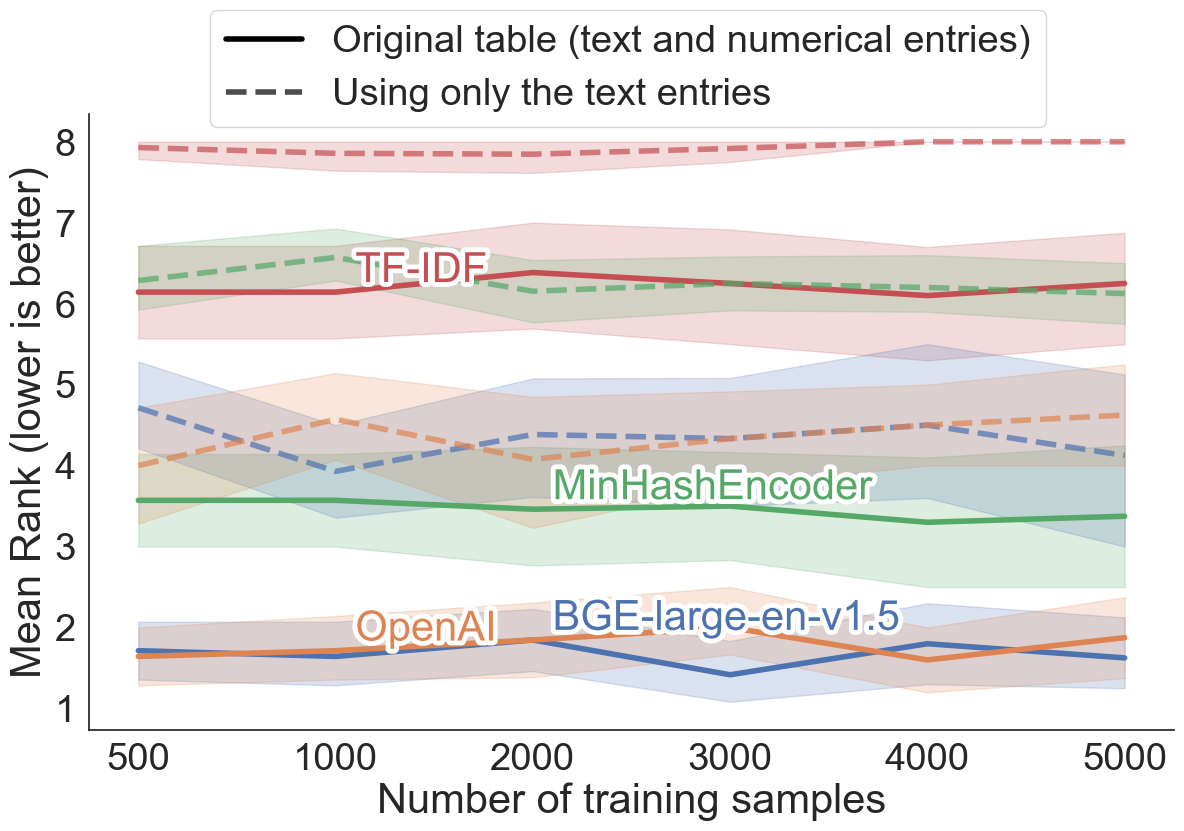

In [6]:
# Set the style and scale of the plot
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

sns.set(style="white", font_scale=2.5, rc={'font.family':'Arial, monospace'})

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))
line_styles = ['-', '--', ':']
alphas = [1, 0.7, 0.6]
# Create lineplot
for i, feature in enumerate(to_plot['features'].unique()):
    subset = to_plot[to_plot['features'] == feature]
    sns.lineplot(data=subset, x="n_train", y="rank", hue="encoding",
                 linewidth=4, ax=ax, legend='brief', linestyle=line_styles[i], alpha=alphas[i])

# Prepare to annotate the lines with adjustText
lines = ax.lines
texts = []
for i, (model, line) in enumerate(zip(to_plot['encoding'].unique(), lines)):
    index = -4 - (i % 2)
    x_last = line.get_xdata()[index] + 0.1
    y_last = line.get_ydata()[index] - 0.02

    text = ax.text(x_last, y_last, model, color=line.get_color())
    text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
    texts.append(text)

# Adjust the text labels
adjust_text(texts, only_move={'points':'y', 'text':'y'})

# Set labels and title
ax.set_xlabel("Number of training samples")
ax.set_ylabel("Mean Rank (lower is better)")

# hide legend
ax.legend().remove()

from matplotlib.lines import Line2D
# Define custom lines for the legend
custom_lines = [Line2D([0], [0], color='black', lw=4, linestyle='-'),
                Line2D([0], [0], color='black', lw=4, linestyle='--', alpha=0.7)]

# Set your legend
ax.legend(custom_lines, ['Original table (text and numerical entries)', 'Using only the text entries'],bbox_to_anchor=(0.9, 1.2))

# Remove the top and right spines from plot
sns.despine()

# save as pdf
#fig.savefig("../figures/mean_rank.pdf")

# Figure 2

In [3]:
import pandas as pd
df_autofj = pd.concat([pd.read_csv("../results/results_join_autofj.csv"), pd.read_csv("../results/results_join_autofj2.csv")])
df_autofj["encoder_name"] = "autofj"
#df_autofj = df_autofj[df_autofj["target"].isin([0.9, np.nan])]
df = pd.read_csv("../results/results_join.csv")#, pd.read_csv("../results/results_join_30_11.csv")])
df = pd.concat([df, df_autofj])

df_grouped = df.groupby(["dataset", "encoder_name"])["f1"].max().reset_index()

from critdd import Diagram
import pandas as pd

rename_dic = {
    "autofj": "AutoFuzzyJoin",
    "lm__BAAI/bge-large-en-v1.5": "BAAI/bge-large-en-v1.5",
    "lm__llmrails/ember-v1": "llmrails/ember-v1",
    "none": "TfidfVectorizer",
    "openai__": "OpenAI"

}

# Apply the renaming
#res.index = res.index.map(rename_dic)
#res = res.reset_index()
df_grouped['encoder_name'] = df_grouped['encoder_name'].replace(rename_dic)
#df_merged['encoder_name'] = df_merged['encoder_name'].replace(rename_dic)
# download example data
df = df_grouped.pivot(
    index = "dataset",
    columns = "encoder_name",
    values = "f1"
)

# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    df.to_numpy(),
    treatment_names = df.columns,
    maximize_outcome = True
)

# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "../figures/join_critdd_test.pdf",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "Mean rank (best f1 score) on the AutoFuzzyJoin benchmark"},
)

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


FileNotFoundError: [Errno 2] No such file or directory: 'pdflatex'

# Figure 3

In [6]:
# save
import pandas as pd
#final_df.to_csv("../results/saved_results_by_col_with_features.csv")
final_df = pd.read_csv("../results/saved_results_by_col_with_features.csv")

import plotly.express as px
import plotly.graph_objects as go
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np


#final_df = final_df[final_df["new_encoder_name"] == "openai__"]

#garbage graph to prevent bug
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()
fig.write_image("random.pdf")

to_plot = final_df[final_df["new_encoder_name"] == "openai__"]
to_plot["log(ngrams_div_by_nrows)"] = np.log10(to_plot["ngrams_div_by_nrows"])


fig = px.scatter(
    to_plot,
    x="ngrams",
    y="gain_percentage",
    log_x=True,
    title="ROC-AUC Gain from OpenAI embeddings over Skrub",
    labels={
        "ngrams_div_by_nrows": "Number of Unique N-grams Divided by N-Rows (log scale)",
        "gain_percentage": "Gain Percentage (%)",
        "ngrams": "Number of Unique N-grams for 1000 rows",
    },
    template="simple_white",
    hover_data=to_plot.columns,
    trendline="lowess",
    trendline_options=dict(frac=0.9)
)

# add line

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
    font=dict(
        #family="Arial, monospace",
        size=23,  # Increase font size here
        color="black"
    )
)

# Add a horizontal line at y=0
fig.add_shape(
    type="line",
    x0=to_plot["ngrams"].min(),
    x1=to_plot["ngrams"].max(),
    y0=0,
    y1=0,
    line=dict(
        color="LightSeaGreen",
        width=1.5,
        dash="dash"
    ),
)

# Add a vertical line at log(x)=2 (original x value would be 10**2 = 100)
fig.add_shape(
    type="line",
    x0=3000,
    x1=3000,
    y0=to_plot["gain_percentage"].min(),
    y1=to_plot["gain_percentage"].max(),
    line=dict(
        color="LightSeaGreen",
        width=1.5,
        dash="dash"
    ),
)

fig.show()

# save as pdf
#fig.write_image("../figures/roc_auc_gain.pdf")

/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_23690/3875289296.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np


#final_df = final_df[final_df["new_encoder_name"] == "openai__"]

#garbage graph to prevent bug
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()
fig.write_image("random.pdf")

to_plot = final_df[final_df["new_encoder_name"] == "openai__"]
to_plot["log(ngrams_div_by_nrows)"] = np.log10(to_plot["ngrams_div_by_nrows"])


fig = px.scatter(
    to_plot,
    x="mean_length",
    y="gain_percentage",
    log_x=True,
    title="ROC-AUC Gain from OpenAI embeddings over Skrub",
    labels={
        "mean_length": "Mean entry length (in characters)",
        "gain_percentage": "Gain Percentage (%)"
    },
    template="simple_white",
    hover_data=to_plot.columns,
    #trendline="lowess",
    trendline_options=dict(frac=0.9)
)

# add line

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
    font=dict(
        #family="Arial, monospace",
        size=23,  # Increase font size here
        color="black"
    )
)


fig.show()

# save as pdf
#fig.write_image("../figures/mean_length.pdf")

/var/folders/fy/__8z8cpn6gs04465sq9g1nq80000gn/T/ipykernel_23690/3326002919.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Figure 4

In [10]:
df = pd.read_csv("../results/column_xp_30_11.csv")

group_cols = ['dataset', 'model', "col_to_encode_with_new", "features", "new_encoder_name"]
# show counts per group
print(df.groupby(group_cols)['roc_auc'].count().reset_index())
melted_results = df.groupby(group_cols)['roc_auc'].mean().reset_index()
melted_results[melted_results["col_to_encode_with_new"] == "no_column"]
features = "all"
to_plot = melted_results[melted_results["features"] == features]
df_no_column = to_plot[(to_plot['col_to_encode_with_new'] == 'no_column') & (to_plot['new_encoder_name'] == 'openai__')]
df_drop = to_plot[(to_plot['new_encoder_name'] == 'drop')]
df_no_column
df_drop
df_no_column
# Merge this base into the original df
final_df = pd.merge(to_plot, df_no_column, on=['dataset', 'model'], suffixes=('', '_no_column'))

final_df = pd.merge(final_df, df_drop, on=['dataset', 'model', "col_to_encode_with_new"], suffixes=('', '_drop'))
final_df
import pandas as pd
import plotly.express as px

final_df = final_df[final_df["new_encoder_name"] != "drop"]
final_df = final_df[final_df["col_to_encode_with_new"] != "no_column"]

       dataset                       model col_to_encode_with_new   features  \
0     bikewale  GradientBoostingClassifier              bike_name        all   
1     bikewale  GradientBoostingClassifier              bike_name        all   
2     bikewale  GradientBoostingClassifier              bike_name        all   
3     bikewale  GradientBoostingClassifier              bike_name        all   
4     bikewale  GradientBoostingClassifier              bike_name        all   
...        ...                         ...                    ...        ...   
4957    zomato  GradientBoostingClassifier              rest_type  text_only   
4958    zomato  GradientBoostingClassifier              rest_type  text_only   
4959    zomato  GradientBoostingClassifier              rest_type  text_only   
4960    zomato  GradientBoostingClassifier              rest_type  text_only   
4961    zomato  GradientBoostingClassifier              rest_type  text_only   

                          new_encoder_n

In [12]:
# columns which have no influence on the prediction
dataset_col_to_ignore = ['bikewale__color', 'bikewale__url',
       'employee-remuneration-and-expenses-earning-over-75000__Name',
       'employee_salary__department', 'employee_salary__department_name',
       'employee_salary__division', 'journal_jcr_cls__ISSN',
       'journal_jcr_cls__eISSN', 'us_accidents_counts__Airport_Code',
       'us_accidents_counts__County', 'us_accidents_severity__Airport_Code',
       'us_accidents_severity__County', 'us_accidents_severity__Zipcode',
       'us_accidents_severity__name', 'us_presidential__name',
       'us_presidential__state', 'us_presidential__state_po',
       'wine_review__country', 'wine_review__designation',
       'wine_review__province', 'wine_review__title', 'wine_review__variety',
       'wine_review__winery', 'zomato__approx_cost(for two people)',
       'zomato__location', 'zomato__rest_type']
final_df["dataset_col"] = final_df["dataset"] + "__" + final_df["col_to_encode_with_new"]
grouped_df = final_df.groupby(["dataset_col", "new_encoder_name"])[["roc_auc_no_column", "roc_auc_drop", "roc_auc"]].max()

final_df = final_df[~np.isin(final_df["dataset_col"], dataset_col_to_ignore)]
final_df["roc_auc_gain"] = 100 * (final_df["roc_auc"] - final_df["roc_auc_no_column"]) / final_df["roc_auc_no_column"]

#new_dataset.to_csv("../results/col_infos.csv")
new_dataset = pd.read_csv("../results/col_infos.csv")
new_dataset["dataset_col"] = new_dataset["dataset"] + "__" + new_dataset["col_to_encode_with_new"]
joined_df = pd.merge(final_df, new_dataset)

In [13]:
# rows missing for this model
joined_df = joined_df[~joined_df["new_encoder_name"].str.contains("lodestone")]
model_df_low_ngrams = joined_df[joined_df["ngrams"] < 3000].groupby(["new_encoder_name"])["roc_auc_gain"].mean().reset_index()
model_df_high_ngrams = joined_df[joined_df["ngrams"] > 3000].groupby(["new_encoder_name"])["roc_auc_gain"].mean().reset_index()
model_df = joined_df.groupby(["new_encoder_name"])["roc_auc_gain"].mean().reset_index()
mteb_results = pd.read_csv("../results/mteb_results.csv")

In [14]:
for df in [model_df, model_df_low_ngrams, model_df_high_ngrams]:
    df["Model"] = df["new_encoder_name"].apply(lambda x: x.split("/")[-1])
    df.drop("new_encoder_name", axis=1, inplace=True)
model_df_joined = pd.merge(model_df, mteb_results, on="Model")
model_df_joined_low_ngrams = pd.merge(model_df_low_ngrams, mteb_results, on="Model")
model_df_joined_high_ngrams = pd.merge(model_df_high_ngrams, mteb_results, on="Model")

# concat and convert to wide
model_df_joined["ngrams"] = "All"
model_df_joined_low_ngrams["ngrams"] = "< 3K"
model_df_joined_high_ngrams["ngrams"] = "> 3K"
model_df_joined = pd.concat([model_df_joined, model_df_joined_low_ngrams, model_df_joined_high_ngrams])
# rename columns
model_df_joined.rename(columns={"roc_auc_gain": "ROC-AUC Gain (%)", "Average (56 datasets)": "MTEB average score", "ngrams": "Number of unique ngrams for 1000 rows"}, inplace=True)
model_df_joined.rename(columns={"Number of unique ngrams for 1000 rows": "Unique ngrams / 1000 rows"}, inplace=True)
fig = px.scatter(
    model_df_joined,
    x = "MTEB average score",
    y = "ROC-AUC Gain (%)",
    trendline="ols",
    color="Unique ngrams / 1000 rows",
    hover_data = model_df_joined.columns,
    template="simple_white",
    title="ROC-AUC Gain for Embedding models over MinHash",
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
    font=dict(
        #family="Arial, monospace",
        size=23,  # Increase font size here
        color="black"
    ),
        # Update legend
    legend=dict(
        #orientation="h",  # Set the legend to horizontal
        #yanchor="top",
        y=1.03,
        #xanchor="left",
        x=0.07
    )
)

# rename columns
# save to pdf
#fig.write_image("../figures/mteb_vs_roc_auc.pdf")


# Figure 5

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:14

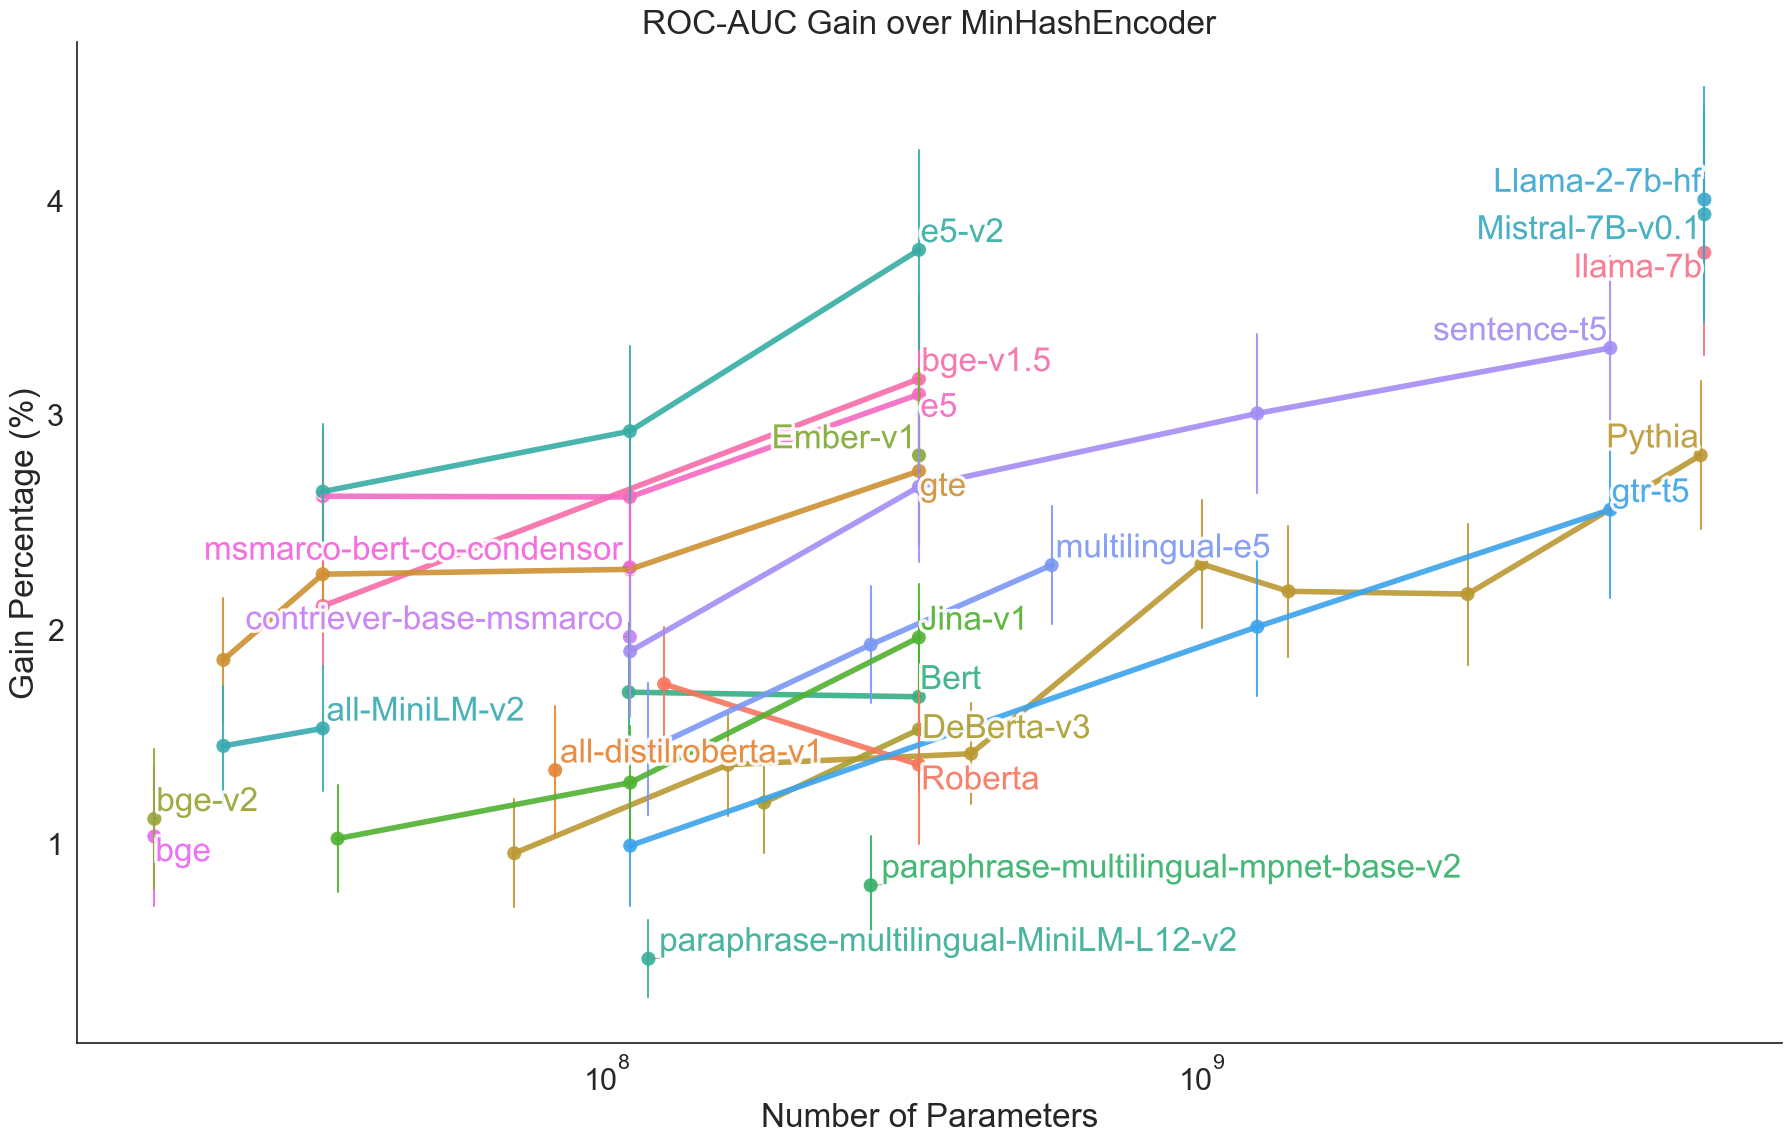

In [16]:
import seaborn as sns
# full table
df_not_average = pd.read_csv("../results/full_table_not_averaged.csv")
# remove "lm__" and "hf__" from "encoding"
df_not_average["encoding"] = df_not_average["encoding"].apply(lambda x: x.replace("lm__", ""))
df_not_average["encoding"] = df_not_average["encoding"].apply(lambda x: x.replace("hf__", ""))
import pandas as pd
merged_dataframe = pd.read_csv("../results/full_table_raw_edited.csv", sep=";")
merged_dataframe = pd.merge(df_not_average, merged_dataframe, on="encoding")
merged_dataframe
# in merged_dataframe["Number of Parameters"], replace Unknown with NaN
#merged_dataframe["Number of Parameters"] = merged_dataframe["Number of Parameters"].apply(lambda x: float(x) if x != "Unknown" else None)
#ValueError: could not convert string to float: '1,4E+09'
merged_dataframe["Number of Parameters"] = merged_dataframe["Number of Parameters"].apply(lambda x: float(x.replace(",", ".")) if x != "Unknown" else None)

# if "family" contains "Unknown", then replace with the encoding
merged_dataframe["family"] = merged_dataframe.apply(lambda x: x["encoding"] if "Unknown" in x["family"] else x["family"], axis=1)

# take family.split("__")[-1] as the family name
merged_dataframe["family"] = merged_dataframe["family"].apply(lambda x: x.split("__")[-1])

# take family.split("/")[-1] as the family name
merged_dataframe["family"] = merged_dataframe["family"].apply(lambda x: x.split("/")[-1])
merged_dataframe
# remove if Number of Parameters is NaN
merged_dataframe = merged_dataframe[merged_dataframe["Number of Parameters"].notna()]
merged_dataframe[merged_dataframe["family"] == "Ember-v1"]
# shuffle sns.color_palette("husl", n_colors=20)
palette = sns.color_palette("husl", n_colors=20)

np.random.permutation([1, 2])
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from adjustText import adjust_text
import numpy as np

# Set the style and scale of the plot
sns.set(style="white", font_scale=2) #rc={'font.family':'Arial, monospace'})

# Create lineplot
plt.figure(figsize=(22,13))
# point marker

grouped_df = merged_dataframe.groupby(['Number of Parameters', 'family'])['gain_percent_x'].mean().reset_index()

# Get the unique values of 'family' and create a color palette
palette = dict(zip(np.random.permutation(grouped_df['family'].unique()), sns.color_palette("husl", n_colors=len(grouped_df['family'].unique()))))

ax = sns.lineplot(data=merged_dataframe, x="Number of Parameters", y="gain_percent_x", hue="family", palette=palette, linewidth=4, markers="o", alpha=0.9, errorbar=("se", 0.5), err_style = "bars")
ax = sns.scatterplot(data=grouped_df, x="Number of Parameters", y="gain_percent_x", hue="family", palette=palette, s=120, marker="o", alpha=0.9)


# Convert x-axis to log scale
ax.set(xscale="log")
# set xticks


# Prepare to annotate the lines with adjustText
# lines = ax.lines
# texts = []
# for i, (model, line) in enumerate(zip(merged_dataframe['family'].unique(), lines)):
#     x_data = line.get_xdata()
#     y_data = line.get_ydata()
#     sorted_data = sorted(list(zip(x_data, y_data)), key=lambda x: x[0])  # sort by x (Number of Parameters)
#     x_last = sorted_data[-1][0]
#     y_last = sorted_data[-1][1]

#     text = ax.text(x_last, y_last, model, color=line.get_color(), alpha=0.9)
#     text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='white')])
#     texts.append(text)
# Prepare to annotate the lines with adjustText
# lines = ax.lines
# texts = []

# for model, line in zip(merged_dataframe['family'].unique(), lines):
#     x_data = line.get_xdata()
#     y_data = line.get_ydata()
#     sorted_data = sorted(list(zip(x_data, y_data)), key=lambda x: x[0])  # sort by x (Number of Parameters)
#     x_last = sorted_data[-1][0]
#     y_last = sorted_data[-1][1]

#     # Get the color corresponding to the model from the palette
#     color = palette[model]

#     text = ax.text(x_last, y_last, model, color=color, alpha=0.9)
#     text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='white')])
#     texts.append(text)

texts = []

for family in grouped_df['family'].unique():
    df_subset = grouped_df[grouped_df['family'] == family]
    # sort by 'Number of Parameters'
    sorted_df = df_subset.sort_values('Number of Parameters')
    x_last = sorted_df.iloc[-1]['Number of Parameters']
    y_last = sorted_df.iloc[-1]['gain_percent_x']

    # Get the color corresponding to the family from the palette
    color = palette[family]

    text = ax.text(x_last, y_last, family, color=color, alpha=0.9)
    text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='white')])
    texts.append(text)

# Adjust the text labels
adjust_text(texts, 
            expand_text=(1.05, 1.05), 
            expand_points=(1.05, 1.05), 
            expand_objects=(1.05, 1.05),
            arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))


#Adjust the text labels
# adjust_text(texts, 
#             expand_text=(1.05, 1.05), 
#             expand_points=(1.05, 1.05), 
#             expand_objects=(1.05, 1.05),
#             arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))



# Set labels and title
ax.set_xlabel("Number of Parameters")
ax.set_ylabel("Gain Percentage (%)")
ax.set_title("ROC-AUC Gain over MinHashEncoder")

# Remove the top and right spines from plot
sns.despine()

# Hide the legend
ax.legend_.remove()

# Show the plot
#plt.show()
# save as pdf
#plt.savefig("../figures/scale_plot_bars.pdf", bbox_inches='tight')

# Figure 6

In [17]:
import pandas as pd
df_skrub = pd.read_csv("../results/results_join.csv")
df_skrub = df_skrub[df_skrub["encoder_name"] == "none"]
df = pd.concat([pd.read_csv("../results/results_join_30_11.csv"), pd.read_csv("../results/results_join_30_11_second_part.csv")])
# remove hf__roberta-base	and lm__jinaai/jina-embedding-l-en-v1	
df = df[df["encoder_name"] != "hf__roberta-base"]
df = df[df["encoder_name"] != "lm__jinaai/jina-embedding-l-en-v1"]
df = pd.concat([df,
 pd.read_csv("../results/results_join_04_12_new.csv"), 
 pd.read_csv("../results/results_join_14_12.csv"),
 pd.read_csv("../results/results_join_14_12_second_part.csv"),
 pd.read_csv("../results/results_join_14_12_third_part.csv"),
 pd.read_csv("../results/results_join_14_12_fourth_part.csv"),
pd.read_csv("../results/results_join_14_12_fasttext.csv"),
pd.read_csv("../results/results_join_14_12_fifth.csv")])

# remove lm__Hum-Works/lodestone-base-4096-v1 because of missing results
df = df[df["encoder_name"] != "lm__Hum-Works/lodestone-base-4096-v1"]
df = df[df["encoder_name"] != "hf__microsoft/deberta-v3-base"]
# for each dataset and encoder name, take the best f1 score
df_grouped = df.groupby(["dataset", "encoder_name"])["f1"].max().reset_index()
df_skrub = df_skrub.groupby(["dataset", "encoder_name"])["f1"].max().reset_index()
df_total = pd.merge(df_grouped, df_skrub, suffixes=["", "_hash"], on="dataset")
df_total["Gain"] = 100 * (df_total["f1"] - df_total["f1_hash"]) / df_total["f1_hash"]

df_total[df_total["Gain"] == df_total["Gain"].max()]
df_total[df_total["encoder_name"].str.contains("bge-micro-v2")]["Gain"].median()
mean_rank = df_total.groupby("encoder_name")["Gain"].median().reset_index()

# # sort
# mean_rank.sort_values()
mean_rank = mean_rank.reset_index()
mean_rank["encoder_name"] = mean_rank["encoder_name"].apply(lambda x: x.split("/")[-1])

mean_rank.sort_values("Gain")
mteb_results = pd.read_csv("../results/mteb_results.csv")
# join mean_rank and mteb_results
joined_df = pd.merge(mean_rank, mteb_results, left_on="encoder_name", right_on="Model")
joined_df
import plotly.express as px

# useless fig

fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()
fig.write_image("random.pdf")

fig = px.scatter(
    joined_df,
    y="Gain",
    x="Average (56 datasets)",
    trendline="ols",
    hover_data=joined_df.columns,
    template="simple_white",

)


fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
    font=dict(
        #family="Arial, monospace",
        size=23,  # Increase font size here
        color="black"
    )
)

# rename axes
fig.update_xaxes(title_text="MTEB average score")
fig.update_yaxes(title_text="F1 Score Gain (%)")
#ttitle
fig.update_layout(title_text="F1 gain from Embedding Models over HashingVectorizer")

# save to pdf
#fig.write_image("../figures/f1_gain.pdf")
#fig

# Figure 7

In [18]:
import pandas as pd
melted_results = pd.read_csv("../results/results_european_cities_pop_log.csv")

res = melted_results[(melted_results["features"] == "text_only") & ((melted_results["dim_reduction"] == "PCA_30") | (melted_results["encoding"].str.contains("skrub"))) & (melted_results["model"] == "GradientBoostingRegressor")]


import plotly.graph_objects as go

# Filter out the data
res_filtered = res[res["cv_name"] == "custom"]
res_filtered = res_filtered[res_filtered["encoding"].isin(["openai__", "skrub__minhash_30"])]

# Rename the labels
res_filtered['encoding'] = res_filtered['encoding'].replace('skrub__minhash_30', 'MinHashEncoder')
res_filtered['encoding'] = res_filtered['encoding'].replace('openai__', 'OpenAI')

# Create boxplot
fig = go.Figure()

# Add box traces
for encoding in res_filtered['encoding'].unique():
    fig.add_trace(go.Box(
        x=res_filtered[res_filtered['encoding'] == encoding]['r2'],
        name=encoding,
        boxpoints='outliers', # show only outliers
        jitter=0.5, # spread out data points for visibility
        whiskerwidth=0.2, # reduce whisker width
        #fillcolor='cls', # fill box with classification color
        marker=dict(
            size=2, # reduce marker size
            color="darkblue"
        ),
        line=dict(width=1), # reduce line width,
    ))

# Add vertical line at x=0
fig.add_shape(type="line",
    xref="x", yref="paper",
    x0=0, y0=0, x1=0, y1=1,
    line=dict(
        color="LightSeaGreen",
        width=1.5,
        dash="dash",
    )
)

# Set plot title and axis labels
fig.update_layout(
    title="R2 Score on European Cities' Population (log)",
    yaxis_title='',
    xaxis_title='R2 Score',
    autosize=False,
    width=800,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
    font=dict(
        family="Arial, monospace",
        size=23,
        color="black"
    ),
    showlegend=False,
    template="simple_white" # use the simple_white template

)

fig.show()

# save as pdf
#fig.write_image("../figures/ood.pdf")

# Figure 8

      dataset                       model dim_reduction  encoding features  \
0    bikewale  GradientBoostingClassifier        PCA_10  openai__      all   
1    bikewale  GradientBoostingClassifier        PCA_10  openai__      all   
2    bikewale  GradientBoostingClassifier        PCA_10  openai__      all   
3    bikewale  GradientBoostingClassifier        PCA_10  openai__      all   
4    bikewale  GradientBoostingClassifier        PCA_10  openai__      all   
..        ...                         ...           ...       ...      ...   
421    zomato  GradientBoostingClassifier        PCA_60  openai__      all   
422    zomato  GradientBoostingClassifier        PCA_60  openai__      all   
423    zomato  GradientBoostingClassifier        PCA_60  openai__      all   
424    zomato  GradientBoostingClassifier        PCA_60  openai__      all   
425    zomato  GradientBoostingClassifier        PCA_60  openai__      all   

     n_train  roc_auc  
0        500        7  
1       1000   

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/leo/mambaforge/envs/skrub/lib/python3.10/site-packages/seaborn/_oldcore.p

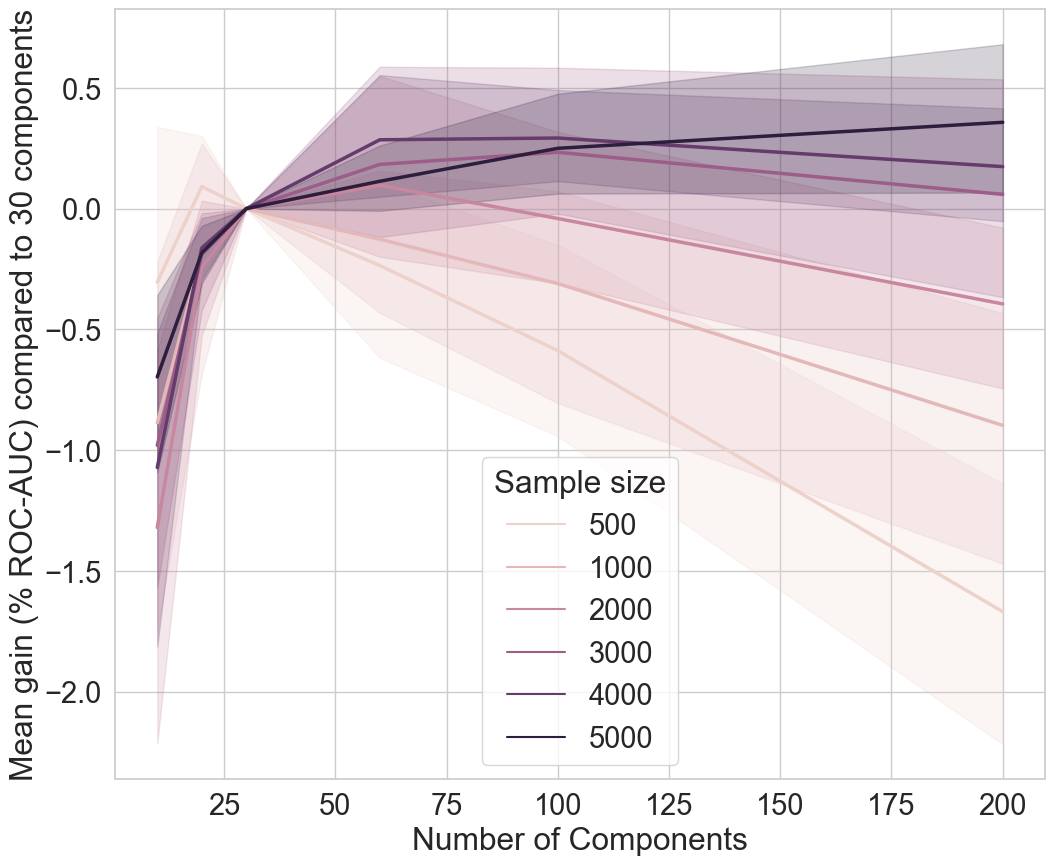

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("../results/results_limited_fixed_18_11_varying_dim.csv")

features = "all"
encoding =  "openai__"
# filter
df = df[(df["features"] == features) & (df["encoding"] == encoding)]
df = df[(df["features"] == features)]

n_train = 1000
#df = df[df["n_train"] == n_train]


group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features", "n_train"]
# show counts per group
print(df.groupby(group_cols)['roc_auc'].count().reset_index())
# assert all 7
print(np.mean(df.groupby(group_cols)['roc_auc'].count().values == 7))


print((df.groupby(group_cols)['roc_auc'].count().values == 7).mean())
df = df.groupby(group_cols)['roc_auc'].mean().reset_index()
print(df.shape)
roc_auc_PCA_30 = df[df["dim_reduction"] == "PCA_30"]
joined_df = pd.merge(df, roc_auc_PCA_30, on=["dataset", "n_train"], suffixes=("", "_PCA_30"))
joined_df["gain"] = 100 * (joined_df["roc_auc"] - joined_df["roc_auc_PCA_30"]) / joined_df["roc_auc_PCA_30"]
joined_df["Number of components"] = joined_df["dim_reduction"].str.split("_").str[1].astype(int)


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



# Set the style of the plot to a seaborn theme
sns.set(style="whitegrid", font_scale=1.9)

# Create a new figure with a specified size
plt.figure(figsize=(12, 10))

# Create a line plot with seaborn
sns.lineplot(data=joined_df, x="Number of components", y="gain", hue="n_train", linewidth=2.5)

# Add a title to the plot
#plt.title('The Effect of Number of Components on Gain', fontsize=20)

# Rename the y-axis
plt.ylabel("Mean gain (% ROC-AUC) compared to 30 components")

# Rename the x-axis
plt.xlabel("Number of Components")

# Increase the font size of the legend and place it outside the plot
plt.legend(title='Sample size')

# Show grid
plt.grid(True)

# save as pdf
#plt.savefig("../figures/varying_dimension.pdf", format='pdf', bbox_inches='tight')

# Figure 9

In [20]:
total_lm = pd.read_csv("../results/full_table_not_averaged_all_n_train.csv")
# only keep e5-large-v2
total_lm = total_lm[total_lm["encoding"].str.contains("e5-large-v2")]
total_lm.n_train.unique()
skrub_varying_dim = pd.concat([pd.read_csv("../results/results_skrub_varying_dims_13_12.csv")])
# average roc_auc on folds
group_variables = ["encoding", "dim_reduction", "model", "n_train", "dataset", "features"]
# # Group by all variables
grouped = skrub_varying_dim.groupby(group_variables)

# # Filter groups with less than 7 elements
filtered_groups = grouped.filter(lambda x: (len(x) != 7) & (len(x) != 14))
#skrub_varying_dim = skrub_varying_dim.groupby(group_variables).mean().reset_index()

In [21]:
# remove skrub__minhash_600 as some rows are missing
skrub_varying_dim = skrub_varying_dim[skrub_varying_dim["encoding"] != "skrub__minhash_600"]
# merge
total_df = pd.merge(skrub_varying_dim, total_lm, on=["dataset", "n_train"], suffixes=["", "_lm"])
# remove goodreads and company_employees as they are too small
total_df = total_df[total_df["dataset"] != "goodreads"]
total_df = total_df[total_df["dataset"] != "company_employees"]
total_df["gain_percent"] = 100 * (total_df["roc_auc_lm"] - total_df["roc_auc"]) / (total_df["roc_auc"])
total_df
# extract the dimension from the encoding
total_df["MinHashEncoder dimension"] = total_df["encoding"].str.split("_").str[3].astype(int)
total_df["n_train"]
import plotly.express as px

import plotly.graph_objs as go

#garbage graph to prevent bug
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()
fig.write_image("random.pdf")

summary_df = total_df.groupby(['MinHashEncoder dimension', "n_train"])['gain_percent'].agg(
    median='median',
    mean='mean',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).reset_index()

# Create the base line plot
fig = px.line(
    summary_df,
    x='MinHashEncoder dimension',
    y='mean',
    log_x=True,
    title='Line plot with Quantiles',
    markers="o",
    template="simple_white",
)

fig.update_traces(line=dict(color='rgba(0,0,0,0)'))

import seaborn as sns

# Get the default color palette from Seaborn
sns_default_palette = sns.color_palette("rocket")  # This is the default palette
# Convert the colors to hex format
sns_default_palette_hex = sns_default_palette.as_hex()

unique_n_train_values = summary_df['n_train'].unique()

#color_scale = px.colors.sequential.Viridis
color_scale = sns_default_palette_hex

# Make sure there are enough colors for the number of unique n_train values
colors = color_scale * (len(unique_n_train_values) // len(color_scale) + 1)
opacity_level = 0.3

for i, n_train in enumerate(unique_n_train_values):
    # Filter the DataFrame for each value of n_train
    df_filtered = summary_df[summary_df['n_train'] == n_train]

    # Convert hexadecimal to RGBA
    hex_color = colors[i]
    hex_color = hex_color.lstrip('#')  # Remove the '#' symbol
    rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4)) # Convert to RGB tuple
    rgba_color = f'rgba({rgb_color[0]},{rgb_color[1]},{rgb_color[2]},{opacity_level})'

    # Add the quantile area
    fig.add_traces(go.Scatter(
        x=pd.concat([df_filtered['MinHashEncoder dimension'], df_filtered['MinHashEncoder dimension'][::-1]]),
        y=pd.concat([df_filtered['q25'], df_filtered['q75'][::-1]]),
        fill='toself',
        fillcolor=rgba_color,
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False,
    ))

for i, n_train in enumerate(unique_n_train_values):
    # Filter the DataFrame for each value of n_train
    df_filtered = summary_df[summary_df['n_train'] == n_train]
    
    # Create a trace for each segment
    fig.add_trace(go.Scatter(
        x=df_filtered['MinHashEncoder dimension'],
        y=df_filtered['mean'],
        mode='lines+markers',
        line=dict(color=colors[i], width=4),  # Use the color from the scale
        name=str(n_train),  # This will be the name in the legend
        # increase the line width and marker size
        marker=dict(size=10),
    ))


fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
    font=dict(
        #family="Arial, monospace",
        size=23,  # Increase font size here
        color="black"
    )
)

# vertical line at 30
fig.add_shape(
    type="line", 
    x0=30, y0=0, 
    x1=30, y1=0.9, 
    line=dict(
        color="black",
        width=2,
        dash="dot",  # Specify the line style to be dotted
    ),
    xref="x",  # References the x-axis
    yref="paper"  # References the entire height of the plot area
)

fig.update_layout(
    title='Using e5-large-v2 compared to MinHashEncoder, <br>varying MinHashEncoder dimension',  # New title
    xaxis_title='MinHash Encoder Dimension',  #New x-axis label
    yaxis_title='ROC-AUC gain (%)'  # New y-axis label
)

# rename legend
fig.update_layout(legend_title_text='Sample size')
# remove legend
#fig.update_layout(showlegend=False)


#fig.show()
#fig.write_image("../figures/minhash_varying_dim.pdf")

# Figure 10

In [22]:
import pandas as pd
df = pd.read_csv("../results/results_ensemble_23_11_stacking.csv")
df = df[df["enc_model"] == "LogisticRegression"]
df = df[df["dim_reduction"] == "passthrough"]
df_none = pd.read_csv("../results/results_limited_fixed_15_11.csv")
df_none["aggregation"] = "none"
df_none["enc_model"] = df_none["model"]
df_none["rest_model"] = "GradientBoostingClassifier"
# drop model
df_none = df_none.drop(columns=["model"])
df = pd.concat([df, df_none])
# filter
encoding = "openai__"
df = df[df["encoding"].str.startswith(encoding)]


group_cols = ["encoding", "enc_model", "rest_model", "dataset", "aggregation", "n_train", "features", "dim_reduction"]
print(df.groupby(group_cols).count())
df = df.groupby(group_cols).mean().reset_index()

# features all
df = df[df["features"] == "all"]

df = df[(df["aggregation"] != "none") | ((df["enc_model"] == "GradientBoostingClassifier") & (df["dim_reduction"] == "PCA_30"))]


# Filter out only the necessary columns
df_filtered = df[['dataset', "n_train", 'aggregation', 'roc_auc']]

# Pivot the DataFrame to have datasets as index,
# aggregation methods as columns and roc_auc as values.
df_pivot = df_filtered.pivot(index=['dataset', "n_train"], columns='aggregation', values='roc_auc')

# Calculate the roc_auc gain for stacking and voting compared to none
df_pivot['stacking_gain'] = 100 * (df_pivot['stacking'] - df_pivot['none']) / df_pivot['none']
df_pivot['voting_gain'] = 100 * (df_pivot['voting'] - df_pivot['none']) / df_pivot['none']

df_pivot = df_pivot.reset_index()

# replace stacking_gain and voting_gain with gain and aggregation
df_pivot = df_pivot.melt(id_vars=['dataset', "n_train"], value_vars=['stacking_gain', 'voting_gain'], var_name='aggregation', value_name='gain')

import plotly.express as px

rename_dict = {
    "stacking_gain": "Stacking",
    "voting_gain": "Voting",
}
df_pivot["aggregation"] = df_pivot["aggregation"].replace(rename_dict)

# rename columns n_train to Number of training samples
# rename column gain to ROC AUC gain (%)
df_pivot = df_pivot.rename(columns={"n_train": "Number of training samples", "gain": "ROC AUC gain (%)", "aggregation": "Aggregation method"})



fig = px.box(
    df_pivot.reset_index(),
    y="ROC AUC gain (%)",#["stacking_gain", "voting_gain"],
    x = "Number of training samples",
    color="Aggregation method",
    #facet_row="aggregation",
    hover_data=df_pivot.columns,
    template="simple_white",
)

fig.update_layout(
    #autosize=False,
    #width=900,
    #height=600,
    # margin=dict(
    #     l=50,
    #     r=50,
    #     b=100,
    #     t=100,
    #     pad=4
    # ),
    paper_bgcolor="white",
    #wh
    font=dict(
        family="Arial, monospace",
        size=23,  # Increase font size here
        color="black"
    )
)

# Add a horizontal line at y=0
fig.add_shape(
    type="line",
    x0=500,
    x1=5000,
    y0=0,
    y1=0,
    line=dict(
        color="black",
        width=3.5,
        dash="dash"
    ),
)

fig.show()



                                                                                                                     n_test  \
encoding enc_model                  rest_model                 dataset  aggregation n_train features  dim_reduction           
openai__ GradientBoostingClassifier GradientBoostingClassifier bikewale none        500     all       PCA_30              7   
                                                                                            text_only PCA_30              7   
                                                                                    1000    all       PCA_30              7   
                                                                                            text_only PCA_30              7   
                                                                                    2000    all       PCA_30              7   
...                                                                                                            